## 1. Importar Librerias

In [1]:
#https://drive.google.com/file/d/1vDi1whBdD0jlltGHunE3RGdG0P9gzYwS/view?usp=sharing
#id del archivo: 1vDi1whBdD0jlltGHunE3RGdG0P9gzYwS
FILEID = "1vDi1whBdD0jlltGHunE3RGdG0P9gzYwS"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O codigos.zip && rm -rf /tmp/cookies.txt
!unzip codigos.zip
!dir

--2022-04-04 04:05:56--  https://docs.google.com/uc?export=download&confirm=&id=1vDi1whBdD0jlltGHunE3RGdG0P9gzYwS
Resolving docs.google.com (docs.google.com)... 108.177.112.101, 108.177.112.138, 108.177.112.139, ...
Connecting to docs.google.com (docs.google.com)|108.177.112.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-00-1g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/oe3te2kdtietb0cum2i2orlk89hmlk1f/1649045100000/11146100322577758036/*/1vDi1whBdD0jlltGHunE3RGdG0P9gzYwS?e=download [following]
--2022-04-04 04:05:56--  https://doc-00-1g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/oe3te2kdtietb0cum2i2orlk89hmlk1f/1649045100000/11146100322577758036/*/1vDi1whBdD0jlltGHunE3RGdG0P9gzYwS?e=download
Resolving doc-00-1g-docs.googleusercontent.com (doc-00-1g-docs.googleusercontent.com)... 172.217.212.132, 2607:f8b0:4001:c03::84
Connecting to doc-00-1g-docs.googleusercontent.com (doc-0

In [1]:
import time
import cv2
import numpy as np
import scipy.io as sio
from main_functions import *
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.cluster import SpectralClustering
from sklearn.model_selection import train_test_split
from sklearn.metrics.cluster import adjusted_rand_score

## 2. Procesamiento de bases de datos sinteticas

### 2.1 Estimacion de etiquetas de bases de datos sinteticas

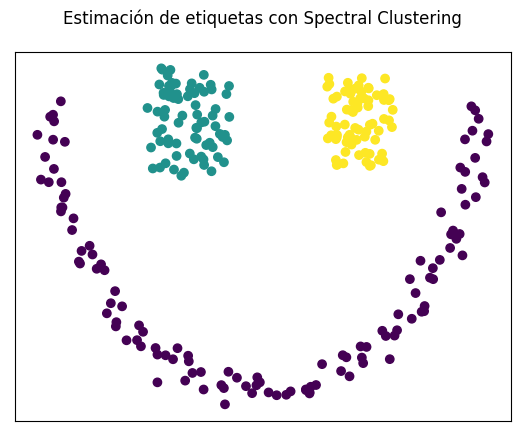

In [2]:
# Cargar base de datos happy
data = sio.loadmat('DB.mat')['DB'][0, 0]
X = data['happy']
# Spectral clustering para la estimacion de etiquetas
sc = SpectralClustering(n_clusters=3, n_neighbors=5, gamma=1000)
sc.fit(X)
y = sc.labels_
# Ilustracion de las etiquetas estimadas
plt.scatter(X[:,0], X[:,1], c=y)
plt.xticks([])
plt.yticks([])
plt.title('Estimación de etiquetas con Spectral Clustering', pad=20)
plt.show()
# Crear conjuntos de entrenamiento y evaluacion
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

### 2.2 Punto Fijo

El tiempo requerido fue: 0.52 sg
Ari score: 1.0
Accuracy score: 1.0


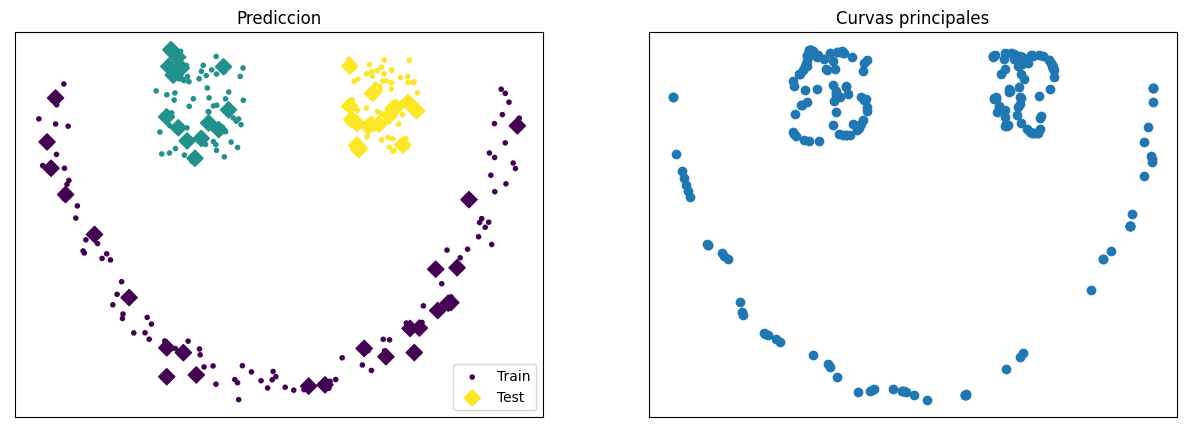

In [3]:
t = time.time()
p = PRI(lambda_=5, n_clusters=3, sigma_initial=15, 
        method='FP', reduction_='SC' )
p.fit(X_train, y_train)
labels_pre_FP = p.predict(X_test)
# Resultados
print(f'El tiempo requerido fue: {time.time() - t:.2f} sg')
Rari_FP = adjusted_rand_score(y_test, labels_pre_FP)
Racc_FP = accuracy_score(y_test, labels_pre_FP)
print(f'Ari score: {Rari_FP:.1f}\nAccuracy score: {Racc_FP:.1f}')
## Graficas
fig, ax = plt.subplots(1,2)
fig.set_size_inches(15, 5)
scatter_1 = ax[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
scatter_2 = ax[0].scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_FP, marker='D', s=68)
ax[0].legend((scatter_1, scatter_2), ('Train', 'Test'), scatterpoints=1,
           loc='lower right', ncol=1, fontsize=10)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_title('Prediccion')
ax[1].scatter(p.cluster_centers_[:, 0], p.cluster_centers_[:, 1])
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_title('Curvas principales')
plt.show()

### 2.3 Gradiente descendiente (SGD)

El tiempo requerido fue: 0.47 sg
Ari score: 1.0
Accuracy score: 1.0


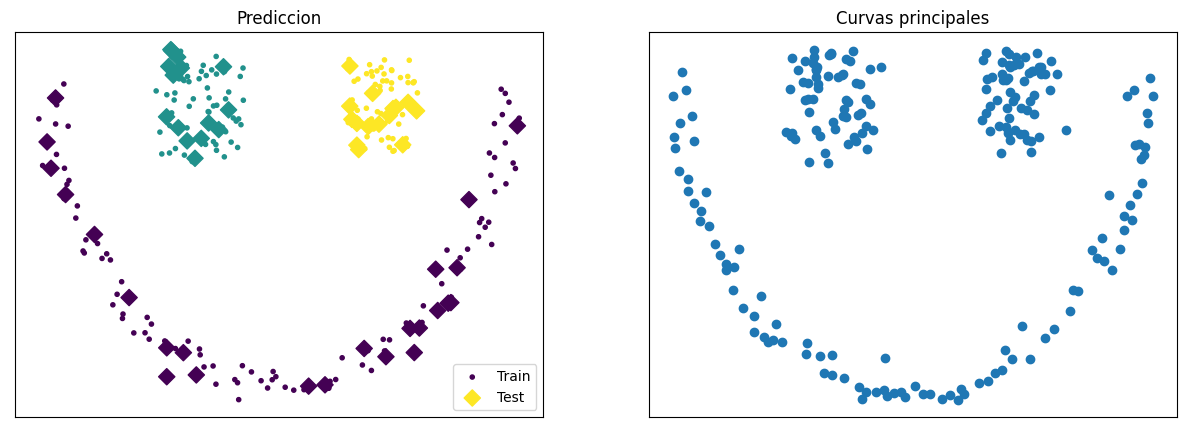

In [4]:
t = time.time()
p = PRI(n_clusters=3, sigma_initial=35, method ='SGD',  
        reduction_='SC',learning_rate=0.009)
p.fit(X_train, y_train)
labels_pre_FP = p.predict(X_test)
# Resultados
print(f'El tiempo requerido fue: {time.time() - t:.2f} sg')
Rari_FP = adjusted_rand_score(y_test, labels_pre_FP)
Racc_FP = accuracy_score(y_test, labels_pre_FP)
print(f'Ari score: {Rari_FP:.1f}\nAccuracy score: {Racc_FP:.1f}')
## Graficas
fig, ax = plt.subplots(1,2)
fig.set_size_inches(15, 5)
scatter_1 = ax[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
scatter_2 = ax[0].scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_FP, marker='D', s=68)
ax[0].legend((scatter_1, scatter_2), ('Train', 'Test'), scatterpoints=1,
           loc='lower right', ncol=1, fontsize=10)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_title('Prediccion')
ax[1].scatter(p.cluster_centers_[:, 0], p.cluster_centers_[:, 1])
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_title('Curvas principales')
plt.show()

### 2.4 Gradiente Descendiente por lotes 

El tiempo requerido fue: 0.24 sg
Ari score: 1.0
Accuracy score: 1.0


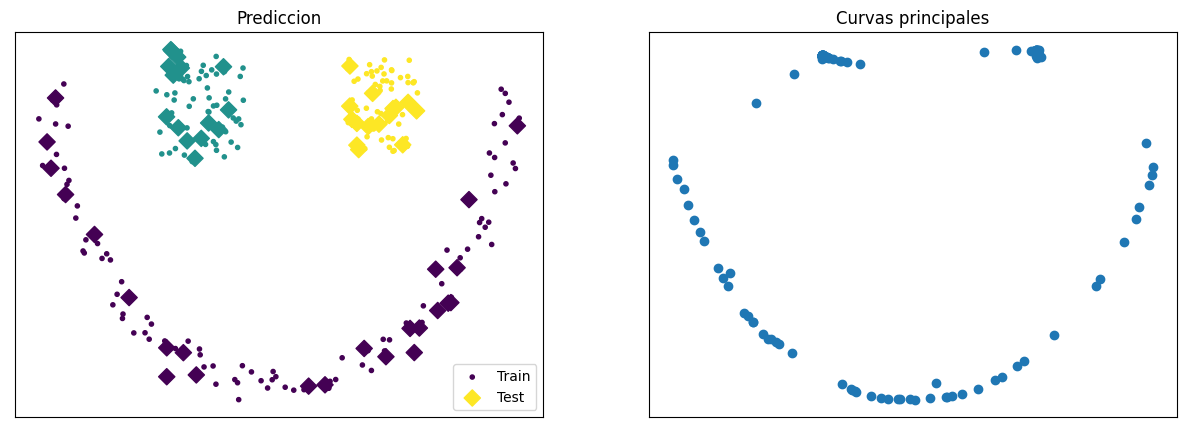

In [5]:
t = time.time()
p = MiniBatchPRI(lambda_=2, sigma_initial=35, optimization='Nadam', 
                reduction_='SC', gamma_=500, learning_rate=0.001)
p.fit(X_train, y_train)
labels_pre_SGDA = p.predict(X_test)
# Resultados
print(f'El tiempo requerido fue: {time.time() - t:.2f} sg')
Rari_FP = adjusted_rand_score(y_test, labels_pre_SGDA)
Racc_FP = accuracy_score(y_test, labels_pre_SGDA)
print(f'Ari score: {Rari_FP:.1f}\nAccuracy score: {Racc_FP:.1f}')
## Graficas
fig, ax = plt.subplots(1,2)
fig.set_size_inches(15, 5)
scatter_1 = ax[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
scatter_2 = ax[0].scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_SGDA, marker='D', s=68)
ax[0].legend((scatter_1, scatter_2), ('Train', 'Test'), scatterpoints=1,
           loc='lower right', ncol=1, fontsize=10)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_title('Prediccion')
ax[1].scatter(p.cluster_centers_[:, 0], p.cluster_centers_[:, 1])
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_title('Curvas principales')
plt.show()

## 3. Procesamiento de bases de datos sinteticas con ruido

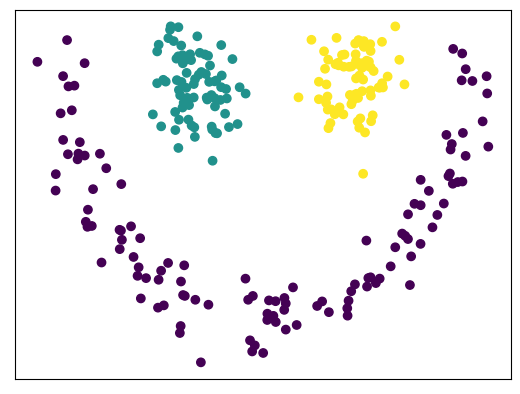

In [6]:
noise = np.random.normal(0,1,X.shape)
noisy_happy = X+noise*0.02
X_train, X_test, y_train, y_test = train_test_split(noisy_happy, y, 
                                                    test_size=0.2, stratify=y)
plt.scatter(noisy_happy[:,0], noisy_happy[:,1],c=y)
plt.xticks([])
plt.yticks([])
plt.show()

### 3.1 Punto Fijo

El tiempo requerido fue: 0.66 sg
Ari score: 1.0
Accuracy score: 1.0


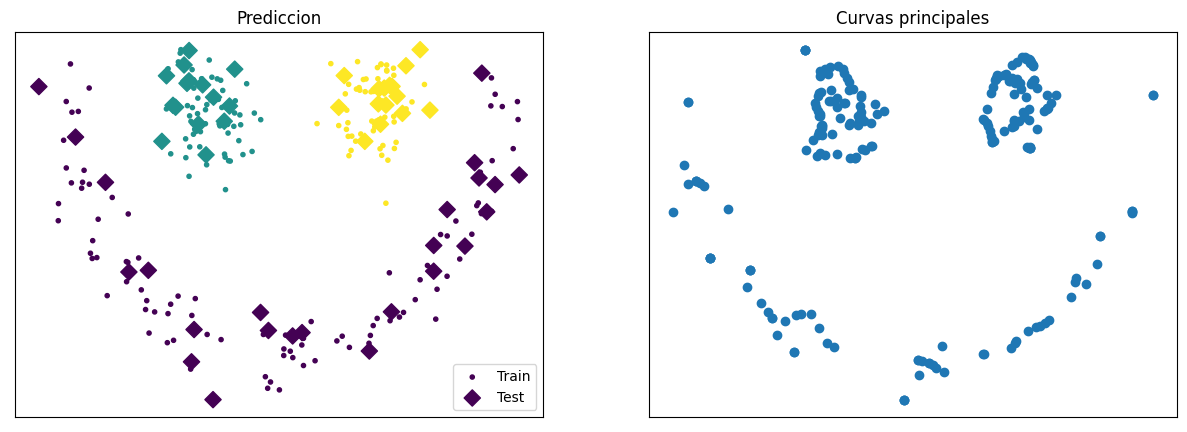

In [7]:
t = time.time()
p = PRI(lambda_=5, n_clusters=3, sigma_initial=15,
        method='FP',reduction_='SC' )
p.fit(X_train, y_train)
labels_pre_FP = p.predict(X_test)
# Resultados
print(f'El tiempo requerido fue: {time.time() - t:.2f} sg')
Rari_FP = adjusted_rand_score(y_test, labels_pre_FP)
Racc_FP = accuracy_score(y_test, labels_pre_FP)
print(f'Ari score: {Rari_FP:.1f}\nAccuracy score: {Racc_FP:.1f}')
## Graficas
fig, ax = plt.subplots(1,2)
fig.set_size_inches(15, 5)
scatter_1 = ax[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
scatter_2 = ax[0].scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_FP, marker='D', s=68)
ax[0].legend((scatter_1, scatter_2), ('Train', 'Test'), scatterpoints=1,
           loc='lower right', ncol=1, fontsize=10)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_title('Prediccion')
ax[1].scatter(p.cluster_centers_[:, 0], p.cluster_centers_[:, 1])
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_title('Curvas principales')
plt.show()

### 3.2 Gradiente Descendiente 

El tiempo requerido fue: 0.44 sg
Ari score: 1.0
Accuracy score: 1.0


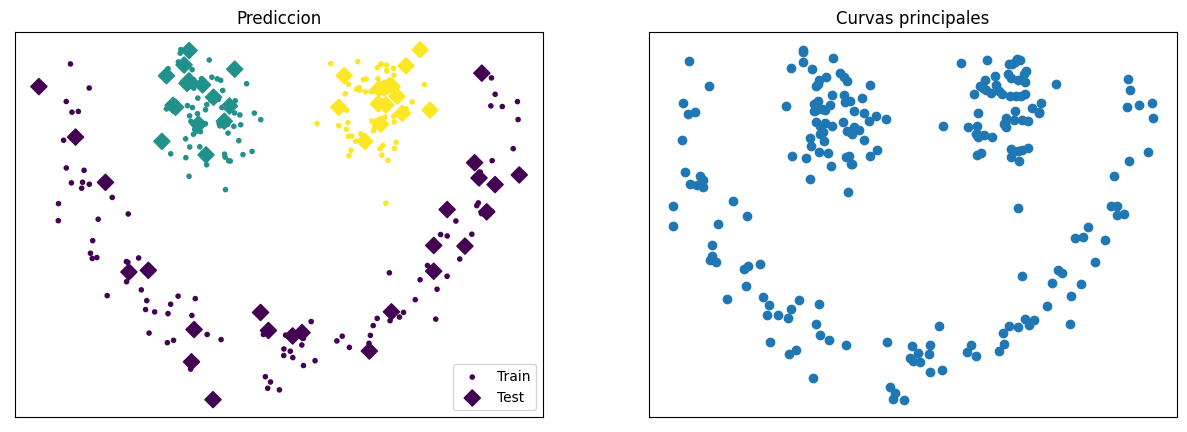

In [8]:
t = time.time()
p = PRI(n_clusters=5, sigma_initial=10, method ='SGD', optimization='Nadam',  
        reduction_='SC', gamma_=1000, learning_rate=0.009)
p.fit(X_train, y_train)
labels_pre_FP = p.predict(X_test)
# Resultados
print(f'El tiempo requerido fue: {time.time() - t:.2f} sg')
Rari_FP = adjusted_rand_score(y_test, labels_pre_FP)
Racc_FP = accuracy_score(y_test, labels_pre_FP)
print(f'Ari score: {Rari_FP:.1f}\nAccuracy score: {Racc_FP:.1f}')
## Graficas
fig, ax = plt.subplots(1,2)
fig.set_size_inches(15, 5)
scatter_1 = ax[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
scatter_2 = ax[0].scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_FP, marker='D', s=68)
ax[0].legend((scatter_1, scatter_2), ('Train', 'Test'), scatterpoints=1,
           loc='lower right', ncol=1, fontsize=10)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_title('Prediccion')
ax[1].scatter(p.cluster_centers_[:, 0], p.cluster_centers_[:, 1])
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_title('Curvas principales')
plt.show()

### 3.3 Gradiente Descendiente por lotes

El tiempo requerido fue: 0.94 sg
Ari score: 0.5
Accuracy score: 0.7


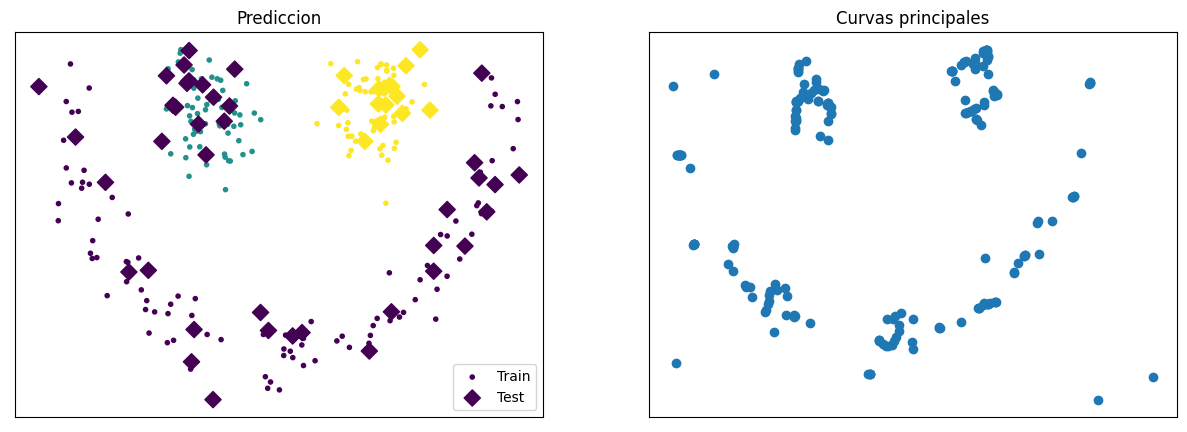

In [9]:
t = time.time()
p = MiniBatchPRI(lambda_=2, sigma_initial=10, optimization='Nadam',
                reduction_='SC', gamma_=1000, learning_rate=0.001)
p.fit(X_train, y_train)
labels_pre_SGDA = p.predict(X_test)
# Resultados
print(f'El tiempo requerido fue: {time.time() - t:.2f} sg')
Rari_FP = adjusted_rand_score(y_test, labels_pre_SGDA)
Racc_FP = accuracy_score(y_test, labels_pre_SGDA)
print(f'Ari score: {Rari_FP:.1f}\nAccuracy score: {Racc_FP:.1f}')
## Graficas
fig, ax = plt.subplots(1,2)
fig.set_size_inches(15, 5)
scatter_1 = ax[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
scatter_2 = ax[0].scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_SGDA, marker='D', s=68)
ax[0].legend((scatter_1, scatter_2), ('Train', 'Test'), scatterpoints=1,
           loc='lower right', ncol=1, fontsize=10)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_title('Prediccion')
ax[1].scatter(p.cluster_centers_[:, 0], p.cluster_centers_[:, 1])
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_title('Curvas principales')
plt.show()

## 4. Procesamiento de datos tomados desde una imagen

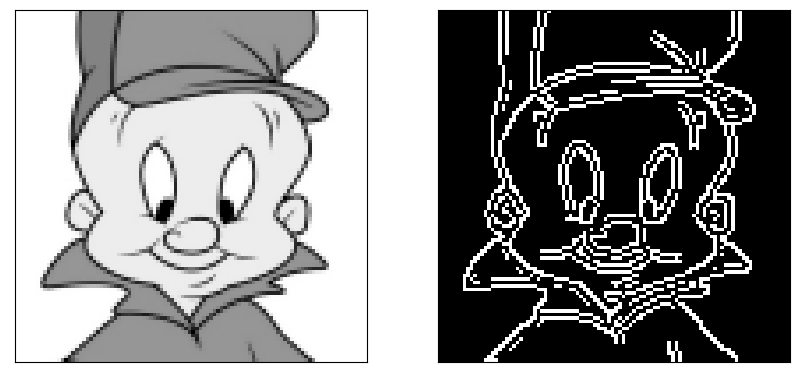

In [10]:
img = cv2.imread('image.PNG',0)
edges = cv2.Canny(img, 100, 255)
indices = np.where(edges != [0])
coordinates = zip(indices[0], indices[1])
indices = np.asarray(indices).T
indices = np.flip(indices)
indices[:,1] = abs(indices[:,1]-np.amax(indices))
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(img, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.subplot(122)
plt.imshow(edges, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

### 4.1 Punto Fijo

El tiempo requerido fue: 35.90 sg


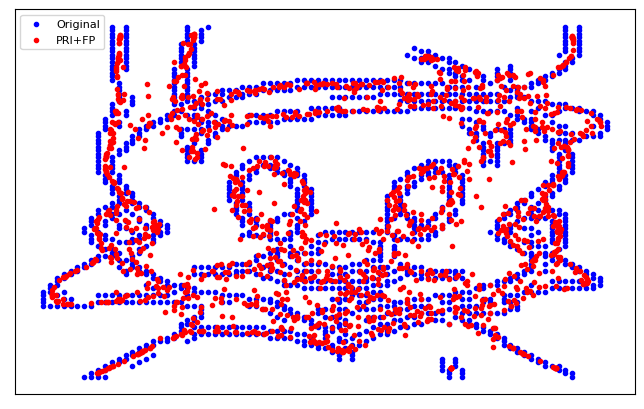

In [11]:
t = time.time()
p = PRI(lambda_=15, sigma_initial=25, method='FP')
p.fit(indices)
print(f'El tiempo requerido fue: {time.time() - t:.2f} sg')
# Grafica
plt.figure(figsize=(8,5))
scatter_1 = plt.scatter(indices[:,0], indices[:,1], marker='.', c='blue')
scatter_2 = plt.scatter(p.cluster_centers_[:,0], p.cluster_centers_[:,1], marker='.', c='red')
plt.legend((scatter_1, scatter_2), ('Original', 'PRI+FP'), scatterpoints=1,
           loc='upper left', ncol=1, fontsize=8)
plt.xticks([])
plt.yticks([])
plt.show()


### 4.2 Gradiente descendiente (SGD)

El tiempo requerido fue: 36.60 sg


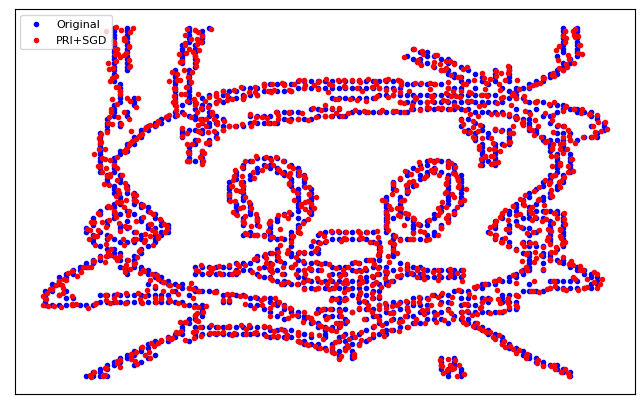

In [12]:
t = time.time()
p = PRI(lambda_=5, sigma_initial=10, method ='SGD', 
        learning_rate=0.9, optimization='Nadam')
p.fit(indices)
print(f'El tiempo requerido fue: {time.time() - t:.2f} sg')
# Grafica
plt.figure(figsize=(8,5))
scatter_1 = plt.scatter(indices[:,0], indices[:,1], marker='.', c='blue')
scatter_2 = plt.scatter(p.cluster_centers_[:,0], p.cluster_centers_[:,1], marker='.', c='red')
plt.legend((scatter_1, scatter_2), ('Original', 'PRI+SGD'), scatterpoints=1,
           loc='upper left', ncol=1, fontsize=8)
plt.xticks([])
plt.yticks([])
plt.show()


### 4.3 Gradiente Descendiente por lotes

El tiempo requerido fue: 85.47 sg


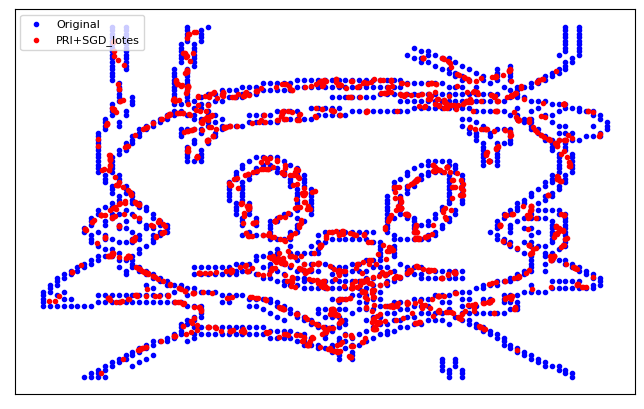

In [13]:
t = time.time()
p = MiniBatchPRI(lambda_=2, sigma_initial=35, 
                optimization='Nadam', learning_rate=0.05)
p.fit(indices)
print(f'El tiempo requerido fue: {time.time() - t:.2f} sg')
# Grafica
plt.figure(figsize=(8,5))
scatter_1 = plt.scatter(indices[:,0], indices[:,1], marker='.', c='blue')
scatter_2 = plt.scatter(p.cluster_centers_[:,0], p.cluster_centers_[:,1], marker='.', c='red')
plt.legend((scatter_1, scatter_2), ('Original', 'PRI+SGD_lotes'), scatterpoints=1,
           loc='upper left', ncol=1, fontsize=8)
plt.xticks([])
plt.yticks([])
plt.show()
